In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.decomposition import PCA
from sklearn import preprocessing


from sklearn import metrics
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings('ignore')

# Loading the data:

In [2]:
def addOther(p,folder,filename):
    p = p.ix[700:]
    r = p[p[' Hand Type']=='right']
    l = p[p[' Hand Type']=='left']
    r.set_index(' Frame ID',inplace=True)
    l.set_index(' Frame ID',inplace=True)
    f = pd.DataFrame(pd.merge(l,r, how='left',on=' Frame ID'))
    f = f.drop([' Hand Type_x',' # hands_y' ,' Hand Type_y' ,' # hands_x'],axis=1)
    f.columns = ['Time', ' Position X_left', ' Position Y_left', ' Position Z_left', ' Velocity X_left', ' Velocity Y_left',
       ' Velocity Z_left', ' Pitch_left', ' Roll_left', ' Yaw_left', ' Wrist Pos X_left',
       ' Wrist Pos Y_left', ' Wrist Pos Z_left', ' Elbow Pos X_left', ' Elbow Pos Y_left',
       ' Elbow Pos Z_left', ' Grab Strength_left', ' Grab Angle_left', ' Pinch Strength_left', 'Time_right', ' Position X_right',
       ' Position Y_right', ' Position Z_right', ' Velocity X_right', ' Velocity Y_right',
       ' Velocity Z_right', ' Pitch_right', ' Roll_right', ' Yaw_right', ' Wrist Pos X_right',
       ' Wrist Pos Y_right', ' Wrist Pos Z_right', ' Elbow Pos X_right', ' Elbow Pos Y_right',
       ' Elbow Pos Z_right', ' Grab Strength_right', ' Grab Angle_right', ' Pinch Strength_right']
    f.drop('Time_right', inplace=True,axis=1)
    f.insert(loc=0, column='Name', value=folder)
    if 'Spontan' in filename:
        f.insert(loc=1, column='Type', value='Spontan')
    else:
        if 'Sync' in filename:
            f.insert(loc=1, column='Type', value='Sync')
        else:
            f.insert(loc=1, column='Type', value='Alone')
    return f

In [3]:
def addAlone(p,r,folder):
    p = p.ix[700:]
    r=r[:len(p)-1]
    r = r.reset_index(drop=True)
    p.set_index(' Frame ID',inplace=True)
    p = p.reset_index(drop=True)
    f = pd.concat([p,r],axis=1)
    f = f.drop([' Hand Type',' # hands',' Frame ID'],axis=1)
    f.columns = ['Time', ' Position X_left', ' Position Y_left', ' Position Z_left', ' Velocity X_left', ' Velocity Y_left',
       ' Velocity Z_left', ' Pitch_left', ' Roll_left', ' Yaw_left', ' Wrist Pos X_left',
       ' Wrist Pos Y_left', ' Wrist Pos Z_left', ' Elbow Pos X_left', ' Elbow Pos Y_left',
       ' Elbow Pos Z_left', ' Grab Strength_left', ' Grab Angle_left', ' Pinch Strength_left', 'Time_right', ' Position X_right',
       ' Position Y_right', ' Position Z_right', ' Velocity X_right', ' Velocity Y_right',
       ' Velocity Z_right', ' Pitch_right', ' Roll_right', ' Yaw_right', ' Wrist Pos X_right',
       ' Wrist Pos Y_right', ' Wrist Pos Z_right', ' Elbow Pos X_right', ' Elbow Pos Y_right',
       ' Elbow Pos Z_right', ' Grab Strength_right', ' Grab Angle_right', ' Pinch Strength_right']
    f.drop('Time_right', inplace=True,axis=1)
    f.insert(loc=0, column='Name', value=folder)
    f.insert(loc=1, column='Type', value='Alone')
    return f


In [4]:
def upload(path):
    df = pd.DataFrame(columns=
                  ['Name', 'Type','Time', ' Position X_left', ' Position Y_left', ' Position Z_left', ' Velocity X_left', ' Velocity Y_left',
       ' Velocity Z_left', ' Pitch_left', ' Roll_left', ' Yaw_left', ' Wrist Pos X_left',
       ' Wrist Pos Y_left', ' Wrist Pos Z_left', ' Elbow Pos X_left', ' Elbow Pos Y_left',
       ' Elbow Pos Z_left', ' Grab Strength_left', ' Grab Angle_left', ' Pinch Strength_left', ' Position X_right',
       ' Position Y_right', ' Position Z_right', ' Velocity X_right', ' Velocity Y_right',
       ' Velocity Z_right', ' Pitch_right', ' Roll_right', ' Yaw_right', ' Wrist Pos X_right',
       ' Wrist Pos Y_right', ' Wrist Pos Z_right', ' Elbow Pos X_right', ' Elbow Pos Y_right',
       ' Elbow Pos Z_right', ' Grab Strength_right', ' Grab Angle_right', ' Pinch Strength_right'])
    r=pd.read_csv('HandRight.csv')
    for filename in os.listdir(path):
        print(filename)
        for fu in os.listdir(path + '\\' + filename):
            x = pd.read_csv(path + '\\' + filename+'\\'+fu)
#         print(fu)
            df = pd.concat([df, addOther(x,filename,fu)]) if 'Alone' not in fu else pd.concat([df, addAlone(x,r,filename)])
    df.reset_index(level=0, inplace=True)
    df.columns = ['Frame ID','Name','Type','Time', ' Position X_left', ' Position Y_left', ' Position Z_left', ' Velocity X_left', ' Velocity Y_left',
       ' Velocity Z_left', ' Pitch_left', ' Roll_left', ' Yaw_left', ' Wrist Pos X_left',
       ' Wrist Pos Y_left', ' Wrist Pos Z_left', ' Elbow Pos X_left', ' Elbow Pos Y_left',
       ' Elbow Pos Z_left', ' Grab Strength_left', ' Grab Angle_left', ' Pinch Strength_left', ' Position X_right',
       ' Position Y_right', ' Position Z_right', ' Velocity X_right', ' Velocity Y_right',
       ' Velocity Z_right', ' Pitch_right', ' Roll_right', ' Yaw_right', ' Wrist Pos X_right',
       ' Wrist Pos Y_right', ' Wrist Pos Z_right', ' Elbow Pos X_right', ' Elbow Pos Y_right',
       ' Elbow Pos Z_right', ' Grab Strength_right', ' Grab Angle_right', ' Pinch Strength_right']
    df.dropna(inplace=True, axis=0, how="any")
    df = df[df.index % 20 == 0]
    return df

In [5]:
path = r'C:\Users\noaiz\Desktop\MLproject\Unity Data\Training'
train = upload(path)

Evyatar Cohen
Nofar Social_Nuero
Oriya Social_Nuero
Orya Kalmanovitz
Revital Marbel
Shahar Terner
Shelly Social_Nuero
Yael Hagai
Yoel Raz


In [6]:
path = r'C:\Users\noaiz\Desktop\MLproject\Unity Data\Validation'
test = upload(path)

Itiel Lab
Mor SHerman
Oded Medina


In [7]:
train.groupby('Type').count()

,Frame ID,Name,Time,Position X_left,Position Y_left,Position Z_left,Velocity X_left,Velocity Y_left,Velocity Z_left,Pitch_left,...,Yaw_right,Wrist Pos X_right,Wrist Pos Y_right,Wrist Pos Z_right,Elbow Pos X_right,Elbow Pos Y_right,Elbow Pos Z_right,Grab Strength_right,Grab Angle_right,Pinch Strength_right
Type,,,,,,,,,,,,,,,,,,,,,
Alone,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,...,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642
Spontan,3061,3061,3061,3061,3061,3061,3061,3061,3061,3061,...,3061,3061,3061,3061,3061,3061,3061,3061,3061,3061
Sync,3022,3022,3022,3022,3022,3022,3022,3022,3022,3022,...,3022,3022,3022,3022,3022,3022,3022,3022,3022,3022


In [8]:
train.columns

Index(['Frame ID', 'Name', 'Type', 'Time', ' Position X_left',
       ' Position Y_left', ' Position Z_left', ' Velocity X_left',
       ' Velocity Y_left', ' Velocity Z_left', ' Pitch_left', ' Roll_left',
       ' Yaw_left', ' Wrist Pos X_left', ' Wrist Pos Y_left',
       ' Wrist Pos Z_left', ' Elbow Pos X_left', ' Elbow Pos Y_left',
       ' Elbow Pos Z_left', ' Grab Strength_left', ' Grab Angle_left',
       ' Pinch Strength_left', ' Position X_right', ' Position Y_right',
       ' Position Z_right', ' Velocity X_right', ' Velocity Y_right',
       ' Velocity Z_right', ' Pitch_right', ' Roll_right', ' Yaw_right',
       ' Wrist Pos X_right', ' Wrist Pos Y_right', ' Wrist Pos Z_right',
       ' Elbow Pos X_right', ' Elbow Pos Y_right', ' Elbow Pos Z_right',
       ' Grab Strength_right', ' Grab Angle_right', ' Pinch Strength_right'],
      dtype='object')

# Visualization:

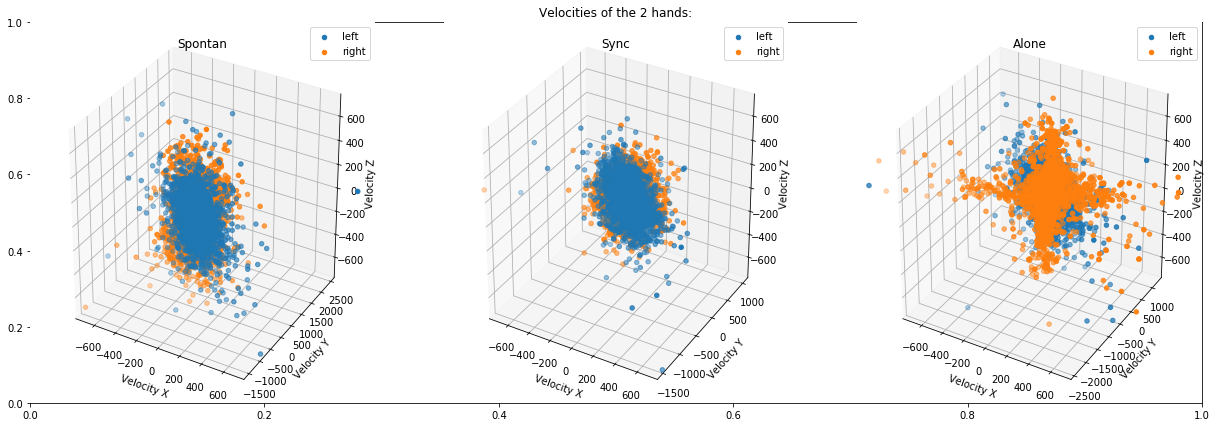

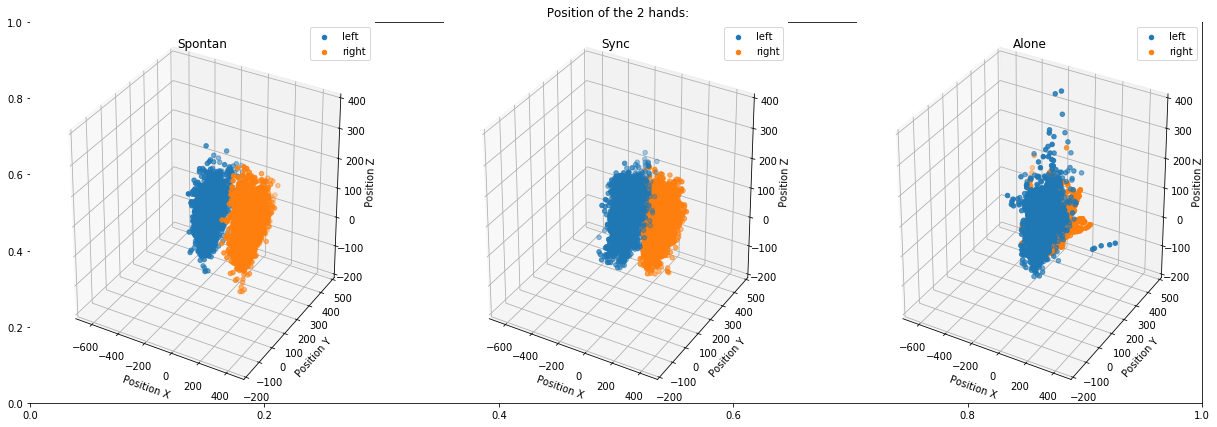

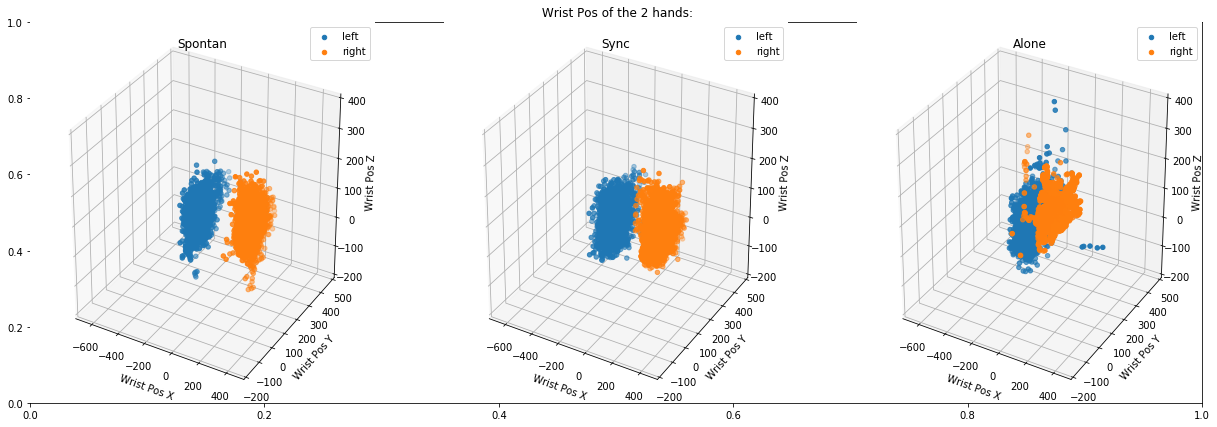

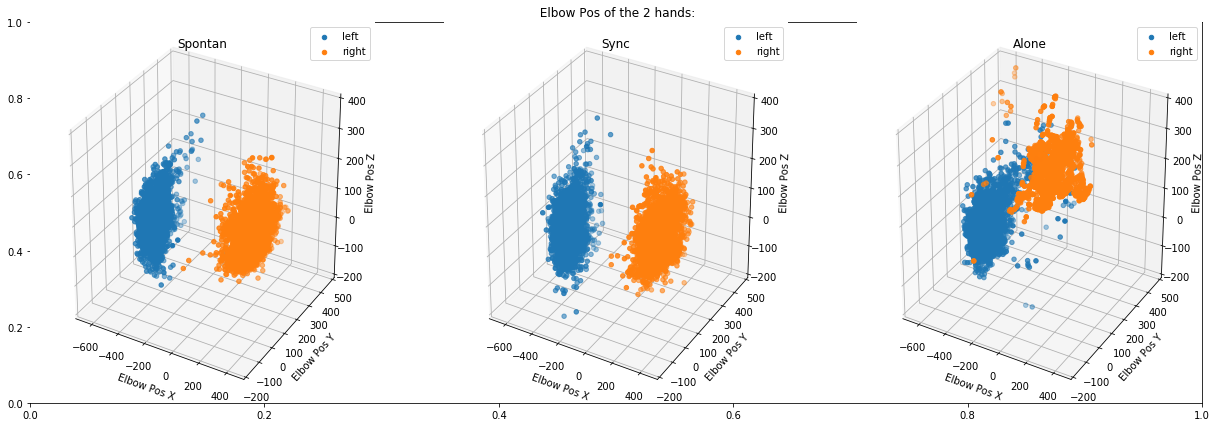

In [9]:
fig = plt.figure(figsize=(21,7))  
plt.title("Velocities of the 2 hands:")
states=['Spontan','Sync','Alone']
velocities=[' Velocity X_left',' Velocity Y_left',' Velocity Z_left',' Velocity X_right',' Velocity Y_right',' Velocity Z_right']
i=1
for state in states:
    ax = fig.add_subplot(1,3,i, projection='3d')
    xl=train[train['Type']==state][velocities[0]]
    yl=train[train['Type']==state][velocities[1]]
    zl=train[train['Type']==state][velocities[2]]
    xr=train[train['Type']==state][velocities[3]]
    yr=train[train['Type']==state][velocities[4]]
    zr=train[train['Type']==state][velocities[5]]
    ax.scatter(xl,yl,zl)
    ax.scatter(xr,yr,zr)
    ax.set_title(state)
    ax.set_xlim([-750,750])
    ax.set_zlim([-750,750])
    ax.set_xlabel("Velocity X")
    ax.set_ylabel("Velocity Y")
    ax.set_zlabel("Velocity Z")
    plt.legend(['left','right'])
    i=i+1

for i in range(1,4):
    if(i==1):
        n=' Position'
    if(i==2):
        n=' Wrist Pos'
    if(i==3):
        n=' Elbow Pos'
    fig = plt.figure(figsize=(21,7))  
    plt.title(n+" of the 2 hands:")    
    Pos=[n+' X_left',n+' Y_left',n+' Z_left',n+' X_right',n+' Y_right',n+' Z_right']
    j=1
    for state in states:
        ax = fig.add_subplot(1,3,j, projection='3d')
        xl=train[train['Type']==state][Pos[0]]
        yl=train[train['Type']==state][Pos[1]]
        zl=train[train['Type']==state][Pos[2]]
        xr=train[train['Type']==state][Pos[3]]
        yr=train[train['Type']==state][Pos[4]]
        zr=train[train['Type']==state][Pos[5]]
        ax.scatter(xl,yl,zl)
        ax.scatter(xr,yr,zr)
        ax.set_title(state)
        ax.set_xlim([-700,500])
        ax.set_ylim([-200,500])
        ax.set_zlim([-200,400])
        ax.set_xlabel(n+' X')
        ax.set_ylabel(n+' Y')
        ax.set_zlabel(n+' Z')
        plt.legend(['left','right'])
        j=j+1

    

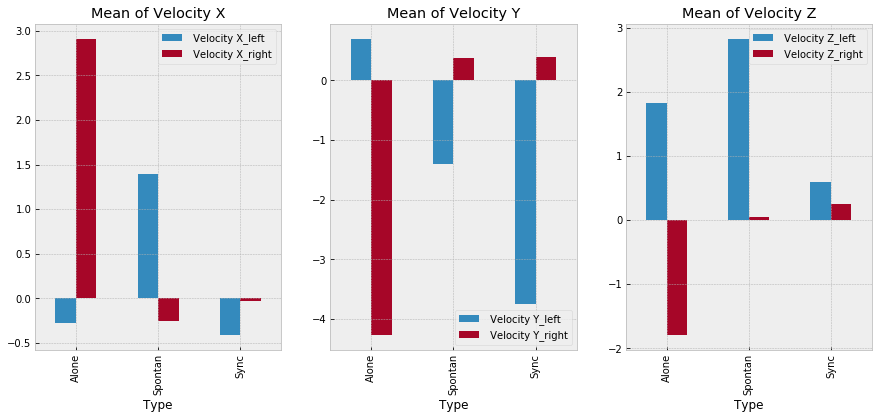

In [10]:
plt.style.use('bmh')
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1,3,1)
dvx=train.groupby(['Type'])[' Velocity X_left', ' Velocity X_right'].mean()
dvx.plot(kind='bar', ax=ax1)
ax1.set_title('Mean of Velocity X')
ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Mean of Velocity Y')
dvy=train.groupby(['Type'])[' Velocity Y_left', ' Velocity Y_right'].mean()
dvy.plot(kind='bar',ax=ax2)
ax3 = fig.add_subplot(1,3,3)
dvz=train.groupby(['Type'])[' Velocity Z_left', ' Velocity Z_right'].mean()
dvz.plot(kind='bar',ax=ax3)
ax3.set_title('Mean of Velocity Z')
plt.show()

**We can see that 'Sync' velocity in general is the lowest**

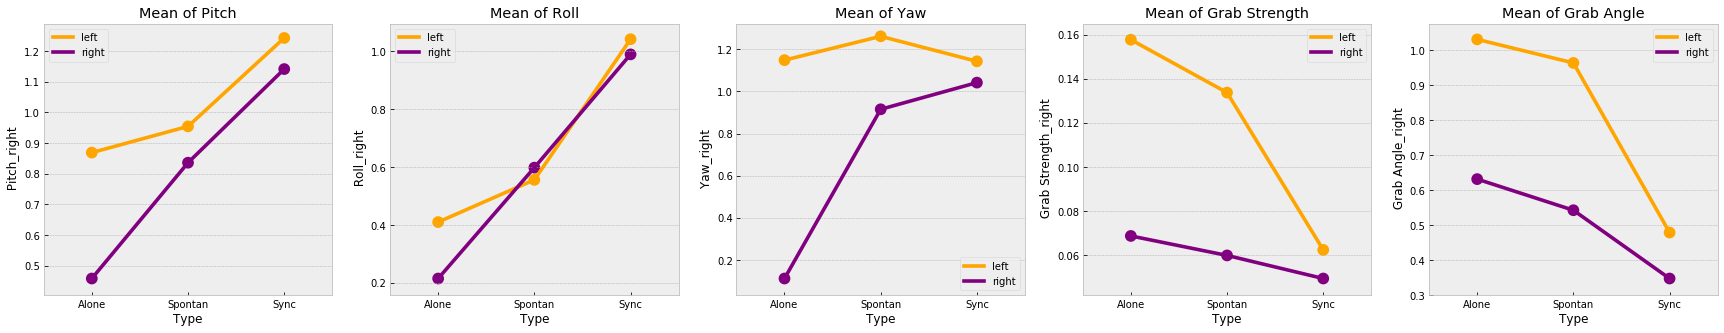

In [11]:
features=[' Pitch',' Roll',  ' Yaw',' Grab Strength', ' Grab Angle']
fig = plt.figure(figsize=(30, 5))
for i in range(0,5):
    fe=features[i]
    ax= fig.add_subplot(1,5,i+1)
    by_fe=train.groupby(['Type'])[fe+'_left', fe+'_right'].mean().abs()
    by_fe['Type']=by_fe.index
    sns.catplot(x="Type", y=(fe+"_left"), kind="point",color='orange', data=by_fe,ax=ax);
    sns.catplot(x="Type", y=(fe+"_right"), kind="point",color='purple', data=by_fe,ax=ax);
    ax.set_title('Mean of'+fe)
    leg=ax.legend(['left','right'])
    leg.legendHandles[0].set_color('orange')
    leg.legendHandles[1].set_color('purple')
    i=i+1
for i in range (2,12):#delete empty graphs
    plt.close(i)

We can see the highest mean of pitch is in Sync state, while the mean of Grab Angle and Strength is the lowest in this state.

In addition, the lowest roll and the highest Grab Strength & Angle is at Alone state.

The Spontan state's mean is most of the time in the middle.

# Label encoding & Spliting the data

In [12]:
print(train['Type'].unique())
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()   
train['Type']= label_encoder.fit_transform(train['Type']) 
test['Type']= label_encoder.fit_transform(test['Type'])   
print(train['Type'].unique())


['Spontan' 'Sync' 'Alone']
[1 2 0]


In [13]:
X=train.drop(['Time','Frame ID','Name'],axis=1)
y=train['Type']


In [14]:
drop=['Type']
test=test.drop(['Time','Frame ID','Name'],axis=1)

In [15]:
X_train = X.drop((drop),axis=1)
y_train = y
y_test = test['Type']
X_test = test.drop(drop, axis =1)


# Zero Model

In [16]:
dc = DummyClassifier(strategy="uniform")
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))

{0: 759, 1: 785, 2: 806}


In [17]:
print("Accuracy of Dummy Classifier (split): ",metrics.accuracy_score(y_test, y_pred))


Accuracy of Dummy Classifier (split):  0.345531914893617


# KNN model

**Parameters tuning**

Text(0, 0.5, 'Testing Accuracy')

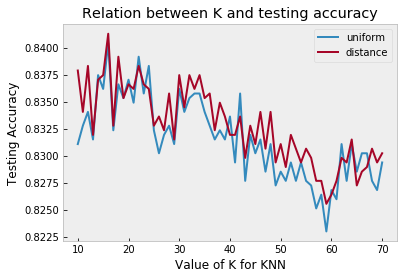

In [18]:
k_range = list(range(10,71))
scores = []
scoresd = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    knnd = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knnd.fit(X_train, y_train)
    y_pred = knnd.predict(X_test)
    scoresd.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.plot(k_range, scoresd)
plt.legend(['uniform','distance'])
plt.grid()
plt.title('Relation between K and testing accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

The highest accuracy is with : **n_neighbors=16, weights='distance'**

In [19]:
knn = KNeighborsClassifier (n_neighbors=16, weights='distance')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",knn.score(X_test,y_test))
print("Training Score: ",knn.score(X_train, y_train))

{0: 758, 1: 810, 2: 782}
Testing Score:  0.8412765957446808
Training Score:  1.0


**Confusion matrix**

In [20]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df


predicted             
                   Alone Spontan Sync
actual Alone         735       0    7
       Spontan         1     635  168
       Sync           22     175  607

In [21]:
print('0: Alone  1: Spontan  2: Sync')
print()
print(classification_report(y_test, y_pred))

0: Alone  1: Spontan  2: Sync

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       742
           1       0.78      0.79      0.79       804
           2       0.78      0.75      0.77       804

   micro avg       0.84      0.84      0.84      2350
   macro avg       0.84      0.85      0.84      2350
weighted avg       0.84      0.84      0.84      2350



**Accuracy:**

In [22]:
print("Accuracy of KNN: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of KNN:  0.8412765957446808


# Logistic Regression

**Parameters tuning:**

In [23]:
penalty_option = ['l1', 'l2']
C = np.arange(0.1,0.7, 0.1)
param_grid= dict(C=C, penalty=penalty_option)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=None,scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)
pd_results=pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
grid.best_params_

{'C': 0.30000000000000004, 'penalty': 'l2'}

In [24]:
logreg = LogisticRegression(C=0.3,penalty='l2')
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",logreg.score(X_test,y_test))
print("Training Score: ",logreg.score(X_train, y_train))

{0: 752, 1: 995, 2: 603}
Testing Score:  0.8553191489361702
Training Score:  0.8491690544412608


**Confusion matrix**

In [25]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
   index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df


predicted             
                   Alone Spontan Sync
actual Alone         741       1    0
       Spontan         0     735   69
       Sync           11     259  534

In [26]:
print('0: Alone  1: Spontan  2: Sync')
print()
print(classification_report(y_test, y_pred))

0: Alone  1: Spontan  2: Sync

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       742
           1       0.74      0.91      0.82       804
           2       0.89      0.66      0.76       804

   micro avg       0.86      0.86      0.86      2350
   macro avg       0.87      0.86      0.86      2350
weighted avg       0.87      0.86      0.85      2350



**Accuracy:**

In [27]:
print("Accuracy of Logistic Regression: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression:  0.8553191489361702


# Gaussian Naive Bayes model

In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",gnb.score(X_test,y_test))
print("Training Score: ",gnb.score(X_train, y_train))

{0: 772, 1: 805, 2: 773}
Testing Score:  0.8646808510638297
Training Score:  0.8286532951289398


**Confusion matrix**

In [29]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df


predicted             
                   Alone Spontan Sync
actual Alone         739       0    3
       Spontan         5     661  138
       Sync           28     144  632

In [30]:
print('0: Alone  1: Spontan  2: Sync')
print()
print(classification_report(y_test, y_pred))

0: Alone  1: Spontan  2: Sync

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       742
           1       0.82      0.82      0.82       804
           2       0.82      0.79      0.80       804

   micro avg       0.86      0.86      0.86      2350
   macro avg       0.87      0.87      0.87      2350
weighted avg       0.86      0.86      0.86      2350



**Accuracy:**

In [31]:
print("Accuracy of Gaussian Naive Bayes: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of Gaussian Naive Bayes:  0.8646808510638297


# Decision Tree Model

**Parameters tuning:**

In [32]:
min_samples_split = np.arange(10,100,10)
max_depth = np.arange(1,20,1)
scores = []
for mss in min_samples_split:
    for md in max_depth:
        dt = DecisionTreeClassifier(random_state=42,max_depth=md,min_samples_split=mss)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        score=[mss,md,metrics.accuracy_score(y_test, y_pred)]
        scores.append(score)
df = pd.DataFrame(scores, columns=['min samples split','max depth','accuracy']).sort_values('accuracy')
df.tail()

,min samples split,max depth,accuracy
29,20,11,0.847660
32,20,14,0.848085
11,10,12,0.848936
12,10,13,0.849787
13,10,14,0.852340


The highest accuracy is with : **min samples split=10 , max depth=14**

In [33]:
dt = DecisionTreeClassifier(random_state=42,min_samples_split=10,max_depth=14)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",dt.score(X_test,y_test))
print("Training Score: ",dt.score(X_train, y_train))

{0: 760, 1: 886, 2: 704}
Testing Score:  0.8523404255319149
Training Score:  0.9700859598853868


**Confusion matrix**

In [34]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df


predicted             
                   Alone Spontan Sync
actual Alone         737       2    3
       Spontan         1     684  119
       Sync           22     200  582

In [35]:
print('0: Alone  1: Spontan  2: Sync')
print()
print(classification_report(y_test, y_pred))

0: Alone  1: Spontan  2: Sync

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       742
           1       0.77      0.85      0.81       804
           2       0.83      0.72      0.77       804

   micro avg       0.85      0.85      0.85      2350
   macro avg       0.86      0.86      0.85      2350
weighted avg       0.85      0.85      0.85      2350



**Accuracy:**

In [36]:
print("Accuracy of Decision Tree: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of Decision Tree:  0.8523404255319149


# Random Forest Classifier

**Parameters tuning**

Text(0, 0.5, 'Testing Accuracy')

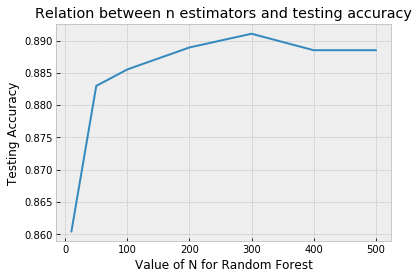

In [37]:
d_range = [10,50,100,200,300,400,500]
scores = []
for d in d_range:
    rfc = RandomForestClassifier(n_estimators=d,random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(d_range, scores)
plt.title('Relation between n estimators and testing accuracy')
plt.xlabel('Value of N for Random Forest')
plt.ylabel('Testing Accuracy')

The highest accuracy is with : **n estimators=300**

In [38]:
rfc = RandomForestClassifier(n_estimators =300,random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",rfc.score(X_test,y_test))
print("Training Score: ",rfc.score(X_train, y_train))

{0: 751, 1: 999, 2: 600}
Testing Score:  0.8910638297872341
Training Score:  1.0


**Confusion matrix**

In [39]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df


predicted             
                   Alone Spontan Sync
actual Alone         742       0    0
       Spontan         0     778   26
       Sync            9     221  574

In [40]:
print('0: Alone  1: Spontan  2: Sync')
print()
print(classification_report(y_test, y_pred))

0: Alone  1: Spontan  2: Sync

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       742
           1       0.78      0.97      0.86       804
           2       0.96      0.71      0.82       804

   micro avg       0.89      0.89      0.89      2350
   macro avg       0.91      0.89      0.89      2350
weighted avg       0.91      0.89      0.89      2350



**Accuracy:**

In [41]:
print("Accuracy of Random Forest: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of Random Forest:  0.8910638297872341


# Adaboost model

**Parameters tuning:**

In [42]:
n_estimators=[50,100,150]
learning_rate=[0.001,0.01,0.1]
scores = []
for n in n_estimators:
    for lr in learning_rate:
        adab = AdaBoostClassifier(n_estimators=n,learning_rate=lr,random_state=42)
        adab.fit(X_train, y_train)
        y_pred = adab.predict(X_test)
        score=[n,lr,metrics.accuracy_score(y_test, y_pred)]
        scores.append(score)
df = pd.DataFrame(scores, columns=['n estimators','learning rate','accuracy'])
df=df.sort_values('accuracy')
df

,n estimators,learning rate,accuracy
0,50,0.001,0.640426
3,100,0.001,0.654043
6,150,0.001,0.654468
1,50,0.010,0.656596
4,100,0.010,0.660851
7,150,0.010,0.694894
5,100,0.100,0.773617
2,50,0.100,0.777021
8,150,0.100,0.777872


The highest accuracy is with : **n estimators=150 , learning rate=0.1**

In [43]:
adab = AdaBoostClassifier(n_estimators=150,learning_rate= 0.1,random_state=42)
adab.fit(X_train, y_train)
y_pred = adab.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",adab.score(X_test,y_test))
print("Training Score: ",adab.score(X_train, y_train))

{0: 703, 1: 797, 2: 850}
Testing Score:  0.7778723404255319
Training Score:  0.7742120343839541


**Confusion matrix**

In [44]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df


predicted             
                   Alone Spontan Sync
actual Alone         694       0   48
       Spontan         0     568  236
       Sync            9     229  566

In [45]:
print('0: Alone  1: Spontan  2: Sync')
print()
print(classification_report(y_test, y_pred))

0: Alone  1: Spontan  2: Sync

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       742
           1       0.71      0.71      0.71       804
           2       0.67      0.70      0.68       804

   micro avg       0.78      0.78      0.78      2350
   macro avg       0.79      0.78      0.78      2350
weighted avg       0.78      0.78      0.78      2350



**Accuracy:**

In [46]:
print("Accuracy of AdaBoost: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of AdaBoost:  0.7778723404255319


# AdaBoost (with Random Forest Classifier)

**Parameters tuning:**

In [47]:
d_range = [10,50,100,200,300,400]
scores = []
for d in d_range:
            rfc = RandomForestClassifier(n_estimators=d,random_state=42)
            adab = AdaBoostClassifier(n_estimators=150,learning_rate= 0.1,base_estimator=rfc,random_state=42)
            adab.fit(X_train, y_train)
            y_pred = adab.predict(X_test)
            score=[d,metrics.accuracy_score(y_test, y_pred)]
            scores.append(score)
df = pd.DataFrame(scores, columns=['n-rfc','accuracy']).sort_values('accuracy')
df

,n-rfc,accuracy
1,50,0.886383
2,100,0.887660
4,300,0.887660
5,400,0.889362
3,200,0.889787
0,10,0.900426


We can see that **n_estimators=10** in Random Forest Classifier as the base estimator for Adaboost model gives the highest accuracy.

Let's check the values for AdaBoost model with this Random Forest Classifier model..

In [48]:
n_estimators=[50,100,150]
learning_rate=[0.001,0.01,0.1]
scores = []
rfc = RandomForestClassifier(n_estimators=10,random_state=42)
for n in n_estimators:
    for lr in learning_rate:
        adab = AdaBoostClassifier(n_estimators=n,learning_rate=lr,base_estimator=rfc,random_state=42)
        adab.fit(X_train, y_train)
        y_pred = adab.predict(X_test)
        score=[n,lr,metrics.accuracy_score(y_test, y_pred)]
        scores.append(score)
df = pd.DataFrame(scores, columns=['n estimators','learning rate','accuracy'])
df=df.sort_values('accuracy')
df

,n estimators,learning rate,accuracy
3,100,0.001,0.888085
0,50,0.001,0.889362
7,150,0.010,0.890213
6,150,0.001,0.891064
1,50,0.010,0.891489
4,100,0.010,0.894894
2,50,0.100,0.896170
8,150,0.100,0.900426
5,100,0.100,0.901277


The highest accuracy is with : **n estimators=100 , learning rate=0.1**

In [49]:
adab = AdaBoostClassifier(n_estimators=100,learning_rate= 0.1,random_state=42,base_estimator=rfc)
adab.fit(X_train, y_train)
y_pred = adab.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",adab.score(X_test,y_test))
print("Training Score: ",adab.score(X_train, y_train))

{0: 750, 1: 840, 2: 760}
Testing Score:  0.9012765957446809
Training Score:  1.0


**Confusion matrix**

In [50]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df


predicted             
                   Alone Spontan Sync
actual Alone         742       0    0
       Spontan         0     710   94
       Sync            8     130  666

In [51]:
print('0: Alone  1: Spontan  2: Sync')
print()
print(classification_report(y_test, y_pred))

0: Alone  1: Spontan  2: Sync

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       742
           1       0.85      0.88      0.86       804
           2       0.88      0.83      0.85       804

   micro avg       0.90      0.90      0.90      2350
   macro avg       0.90      0.90      0.90      2350
weighted avg       0.90      0.90      0.90      2350



**Accuracy:**

In [52]:
print("Accuracy of Random Forest: ",metrics.accuracy_score(y_test, y_pred))
acu_adabrf=metrics.accuracy_score(y_test, y_pred)

Accuracy of Random Forest:  0.9012765957446809


# PCA

In [53]:
algoritms= ["k-Nearest Neighbors","Gaussian Naive Bayes","AdaBoost","Logistic Regression","Decision Tree",'Random Forest']
models= [knn, gnb, adab, logreg, dt,rfc]

In [54]:
accuracies = pd.DataFrame(index=algoritms)
for n in np.arange(1,37,1):
    col=np.arange(1,n+1,1)
    pca = PCA(n_components=n)
    pca.fit(X)
    pc123 = pca.transform(X)
    df_pca = pd.DataFrame(pc123,columns=col)
    pca.fit(test)
    pct123 = pca.transform(test)
    df_pcat = pd.DataFrame(pct123,columns=col)
    result=[]
    for model in models:
        model.fit(df_pca, y_train)
        y_pred = model.predict(df_pcat)
        result.append(metrics.accuracy_score(y_test, y_pred))
    result = pd.DataFrame(result, index=algoritms)   
    result.columns=[n]
    accuracies = pd.concat([accuracies,result],axis=1)
accuracies

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
k-Nearest Neighbors,0.360426,0.425106,0.424255,0.426383,0.403830,0.414043,0.409787,0.420000,0.397872,0.397872,...,0.394894,0.394894,0.394894,0.394894,0.394894,0.394894,0.394894,0.394894,0.394894,0.394894
Gaussian Naive Bayes,0.440851,0.432340,0.466809,0.441702,0.433617,0.423830,0.429362,0.424681,0.426809,0.410638,...,0.455745,0.442553,0.448936,0.474043,0.416170,0.417872,0.422979,0.412766,0.433191,0.435319
AdaBoost,0.348085,0.406383,0.410638,0.407234,0.391064,0.401277,0.384681,0.398298,0.392340,0.363404,...,0.389362,0.376170,0.392340,0.396170,0.342553,0.345532,0.354468,0.343404,0.355319,0.345957
Logistic Regression,0.342128,0.354468,0.353191,0.386809,0.357447,0.352766,0.350213,0.348936,0.340851,0.308511,...,0.318298,0.322553,0.317021,0.347660,0.297447,0.300000,0.300851,0.299574,0.300426,0.299574
Decision Tree,0.402128,0.441277,0.418298,0.422128,0.418723,0.400000,0.395319,0.404681,0.401702,0.391064,...,0.398298,0.408511,0.386383,0.404681,0.312340,0.310638,0.304681,0.305532,0.299574,0.307234
Random Forest,0.344681,0.394468,0.399574,0.413191,0.393191,0.395745,0.390638,0.411915,0.392766,0.383404,...,0.387660,0.362128,0.379574,0.400851,0.302553,0.318298,0.321277,0.343404,0.346383,0.317021


In [55]:
ac=(accuracies.max()).max()
print('The best accuracy using PCA is:')
print(ac)
print()
for n in np.arange(1,20,1):
    m=accuracies[(accuracies[n]==ac)].index
    if(not m.empty):
        print('The models:',m.values)
        print('Number of components: ',n)

The best accuracy using PCA is:
0.47404255319148936



We can see that PCA doesn't have good results.

# The best model:

In [56]:
print ("We've got that the best model is AdaBoost with Random Forest as the base model and the accuracy is:", acu_adabrf*100,'%')

We've got that the best model is AdaBoost with Random Forest as the base model and the accuracy is: 90.12765957446808 %
